In [1]:
import pymongo

client = pymongo.MongoClient()
db = client.snrm
doc_coll = db.docs
query_coll = db.queries

In [2]:
max_q_len = 0
for q in query_coll.find({}):
    q_len = len(q["title"].split(" "))
    if q_len > max_q_len:
        max_q_len = q_len
print("max_q_len:", max_q_len)

max_q_len: 5


In [3]:
docs = []
for doc in doc_coll.find():
    docs.append(doc)

In [4]:
lens = []

min_len = 100000000000
max_len = 0
sum_len = 0

In [5]:
for i, doc in enumerate(docs):
    if i % 50000 == 0:
        print(i, doc["docNo"])
    length = len(doc["tokens"])

    sum_len += length
    if length < min_len:
        min_len = length

    if length > max_len:
        max_len = length
    
    lens.append(length)

0 FBIS3-1
50000 FBIS3-50001
100000 FBIS4-38423
150000 FR940516-1-00106
200000 FT921-960
250000 FT924-12813
300000 FT933-11752
350000 FT942-9942
400000 LA011289-0197
450000 LA053089-0033
500000 LA101790-0031


In [6]:
print('min_len:', min_len)
print('max_len:', max_len)
print('avg_len:', sum_len/len(docs))

min_len: 0
max_len: 375681
avg_len: 494.9575598072536


In [7]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
lens[:10]

[944, 4935, 795, 1118, 1789, 3249, 1464, 1741, 1503, 170]

/home/fanyixing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


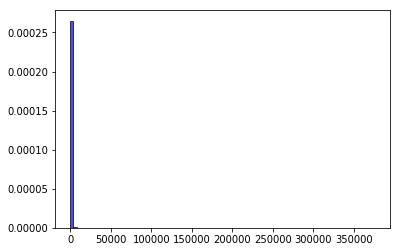

In [9]:
plt.hist(lens, bins=100, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

/home/fanyixing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


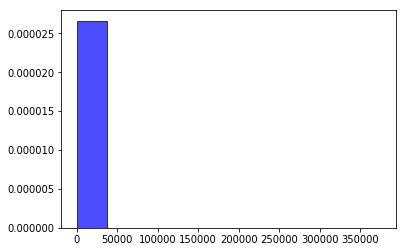

In [10]:
plt.hist(lens, bins=10, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [11]:
(np.array(lens) == 0).sum()  # 本身有4290的数据token长度为0

4290

In [12]:
new_data = np.array(lens) * (np.array(lens) < 4000)

/home/fanyixing/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


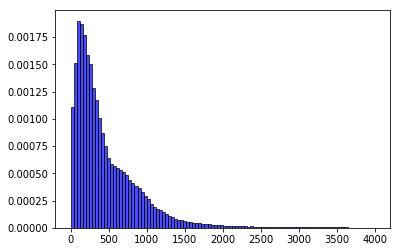

In [13]:
plt.hist(new_data, bins=100, normed=1, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [14]:
(new_data == 0).sum()

6194